# Simulation
Waiting Time Paradox = Memoryless property of Exponential Distribution  
In other words, there is no memory in process, history is not relevant  

The simulation creates environment where **<em>n</em>** buses are scheduled every **<em>x</em>** minutes, one passenger will go to the bustop for every **<em>y</em>** minutes. The experiment's purpose is to show that the average waiting time for each passenger is **<em>x</em>** minutes, where every passenger experience the similar waiting time regardless of what happened in the past.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bisect import bisect_right

np.random.seed(42)

In [2]:
class simulator():
    def __init__(self, 
                 n_buses=10000, 
                 avg_time_per_bus=10, 
                 passenger_arrival_gap=10):
        
        self.n_buses = n_buses
        self.avg_time_per_bus = avg_time_per_bus
        self.passenger_arrival_gap = passenger_arrival_gap
        
        self.bus_arrival_gaps = np.random.exponential(avg_time_per_bus, n_buses).astype(int)
        self.bus_arrival_times = np.cumsum(self.bus_arrival_gaps)
        self.passenger_arrival_times = np.arange(0, self.bus_arrival_times[-1], passenger_arrival_gap)
        self.passenger_waiting_times = np.fromiter(map(self.waiting_time, self.passenger_arrival_times), int)
        
    def waiting_time(self, passenger_arrival_time):
        index = bisect_right(self.bus_arrival_times, passenger_arrival_time)
        return self.bus_arrival_times[index] - passenger_arrival_time
    
    def visualize(self, max_time=200):
        s1 = self.passenger_arrival_times[np.where(self.passenger_arrival_times < max_time)]
        s2 = self.bus_arrival_times[np.where(self.bus_arrival_times < max_time)]

        fig, ax = plt.subplots(figsize=(15, 2))
        ax.scatter(x=s1, y=np.zeros(len(s1)), color='blue', marker='d', s=50, label='passenger arrival')
        ax.scatter(x=s2, y=np.zeros(len(s2)), color='red', marker='x', label='bus arrival')
        ax.axhline(0, color='green', alpha=0.5)
        ax.set_ylim((-1, 1))
        ax.set_title('Timeline Demonstration')
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.legend()
        plt.show()
        
        fig, (ax1, ax2) = plt.subplots(figsize=(15, 5), ncols=2)
        ax1.hist(self.bus_arrival_gaps)
        ax1.set_title('Bus Arrival Time Gap (Minutes)')
        ax2.hist(self.passenger_waiting_times)
        ax2.set_title('Passenger Waiting Time (Minutes)')
        plt.show()
        
        print(self.__repr__())
        print()

        print('Passenger Arrival Times')
        print(s1)
        print()

        print('Bus Arrival Times')
        print(s2)
        print()
    
        mean = self.passenger_waiting_times.mean()
        print('Average Waiting Times', mean)
        print()
        
        print(f'Estimation Error is {abs(self.avg_time_per_bus - mean)/self.avg_time_per_bus:.2%}')
        print()
        
    def __repr__(self):
        return f'Number of Buses = {self.n_buses:,}\n' + \
               f'Average Minutes per Bus = {self.avg_time_per_bus} \n' + \
               f'Average Minutes per Passenger = {self.passenger_arrival_gap}'

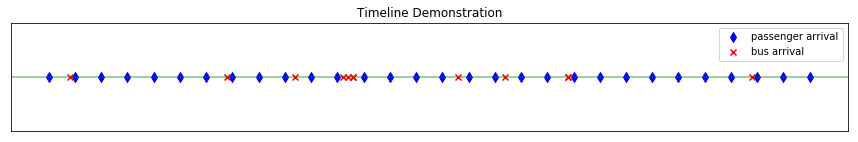

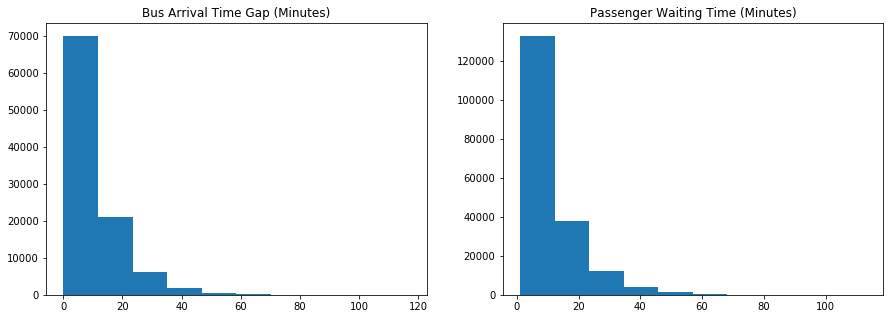

Number of Buses = 100,000
Average Minutes per Bus = 10 
Average Minutes per Passenger = 5

Passenger Arrival Times
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145]

Bus Arrival Times
[  4  34  47  56  57  58  58  78  87  99  99 134]

Average Waiting Times 10.43612278959711

Estimation Error is 4.36%



In [3]:
simulator(n_buses=100000, 
          avg_time_per_bus=10, 
          passenger_arrival_gap=5).visualize(150)

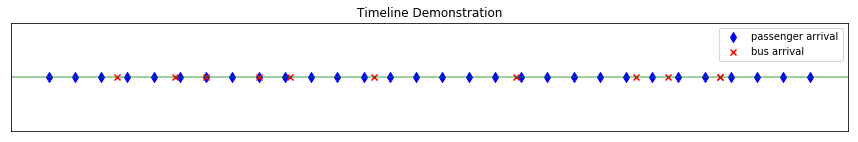

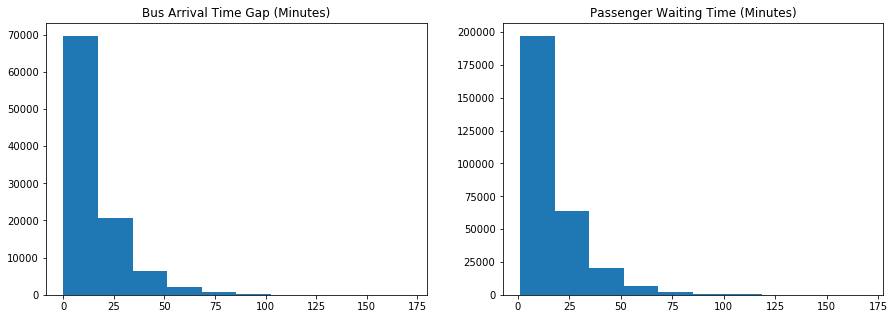

Number of Buses = 100,000
Average Minutes per Bus = 15 
Average Minutes per Passenger = 5

Passenger Arrival Times
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145]

Bus Arrival Times
[ 13  24  30  40  46  62  89 112 118 128 128]

Average Waiting Times 15.571352113545837

Estimation Error is 3.81%



In [4]:
simulator(n_buses=100000, 
          avg_time_per_bus=15, 
          passenger_arrival_gap=5).visualize(150)